## Import library

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

## Read dataset

In [3]:
dataset = pd.read_csv('./dataset/Language Detection.csv')
dataset.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


## Data cleaning

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [5]:
dataset.isnull().sum()

Text        0
Language    0
dtype: int64

In [8]:
dataset.drop_duplicates(inplace = True)

## Data visualization

<BarContainer object of 17 artists>

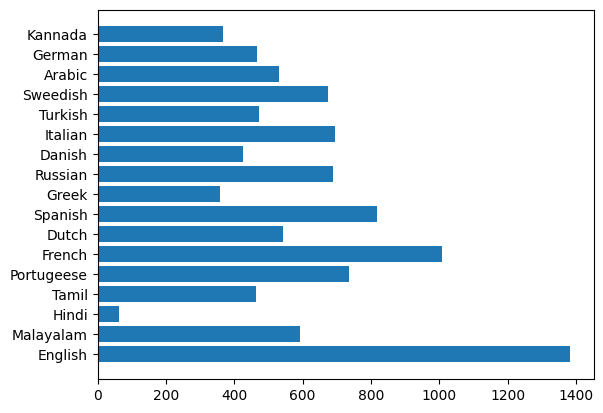

In [11]:
plt.barh(dataset['Language'].unique(), dataset['Language'].value_counts(sort=False).values)

## Model Prediction

In [43]:
X = dataset['Text'].values
y = dataset['Language'].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [45]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7703,), (7703,), (2568,), (2568,))

In [46]:
bow = CountVectorizer()
X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

In [47]:
label_encoder = LabelEncoder()
y_train_encoder = label_encoder.fit_transform(y_train)
y_test_encoder = label_encoder.transform(y_test)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [35]:
dt = DecisionTreeClassifier()
dt.fit(X_train_bow, y_train_encoder)
dt.score(X_test_bow, y_test_encoder)

0.8703271028037384

In [36]:
logistic = LogisticRegression()
logistic.fit(X_train_bow, y_train_encoder)
logistic.score(X_test_bow, y_test_encoder)

0.9478193146417445

In [37]:
rf = RandomForestClassifier()
rf.fit(X_train_bow, y_train_encoder)
rf.score(X_test_bow, y_test_encoder)

0.92601246105919

In [40]:
y_pred = logistic.predict(X_test_bow)
cm = metrics.confusion_matrix(y_pred, y_test_encoder)

In [49]:
y_test = label_encoder.inverse_transform(y_test_encoder)
y_pred = label_encoder.inverse_transform(y_pred)

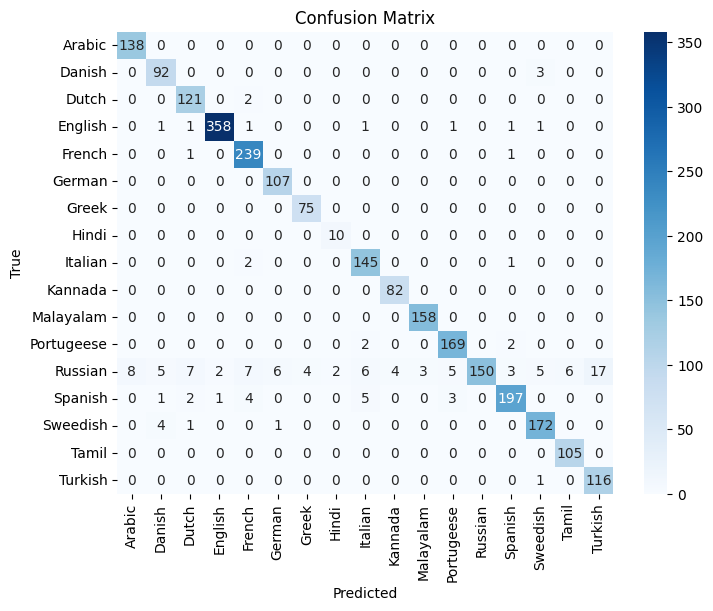

In [51]:
class_names = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()